# i. Introduction

**Name: Indri Yanti**

**Project overview:**
1.	Download Bank Marketing Dataset di website UCI, pilih data folder, ada dua file zip di sana: bank-additional.zip dan bank.zip
2.	Bank-additional.zip punya dua file:
o	Bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
o	Bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3.	Bank.zip punya dua file:
o	Bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
o	Bank.csv with 10% of the examples and 17 inputs, randomly selected form 3 (older version of this dataset with less inputs).
4.	Gunakan file dari bank-additional.zip untuk membuat projek ini pada awalnya
5.	Buat file jupyter Notebook untuk mengerjakan projek
6.	Tulis tujuan projek di awal (apa yang mau dianalisa) dan setiap Langkah yang perlu dilakukan satu per satu, baru kembangkan codenya.
7.	Setelah projek selesai, gunakan file dari bank.zip untuk menjalankan proje sekali lagi, dengan data yang lebih banyak daripada data bank-additional.

**Objective:**
 Project kali ini bertujuan untuk memprediksi klien yang akan menjadi nasabah deposition (yes/no)

# ii. Import Library

In [71]:
# import libraries
import pandas as pd
import numpy as np

# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
import phik
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

# Ignore warning
import warnings
warnings.filterwarnings('ignore')


In [25]:
import urllib.request
import zipfile

# URLs dari dataset
url_additional = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
url_bank = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

# Nama file untuk menyimpan dataset
file_additional = "bank-additional.zip"
file_bank = "bank.zip"

# Unduh file
urllib.request.urlretrieve(url_additional, file_additional)
urllib.request.urlretrieve(url_bank, file_bank)

# Ekstrak file zip
with zipfile.ZipFile(file_additional, 'r') as zip_ref:
    zip_ref.extractall(".")

with zipfile.ZipFile(file_bank, 'r') as zip_ref:
    zip_ref.extractall(".")

# iii. Data Loading

In [26]:
# Load dataset bank-additional-full.csv
df_ori= pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

# Duplicate the dataset
df = df_ori.copy()

# Tampilkan 5 baris pertama
# chcking dataset
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
print(df.head())
print(df.info())
print(df.describe())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [37]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [38]:
# Checking dataset-2
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [39]:
# Checking datset-3
df.duplicated().sum()   # cek ada yang duplicate tidak datanya

12

In [40]:
# Menghilangkan duplicate
df.drop_duplicates(inplace=True) # cara 1
#df = df.drop_duplicates()  # cara 2, ini kalau di overwrite

In [41]:
# Setelah didrop duplicatenya maka jadi 0
df.duplicated().sum()

0

# iv. Exploratory Data Analysis (EDA)

In [43]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

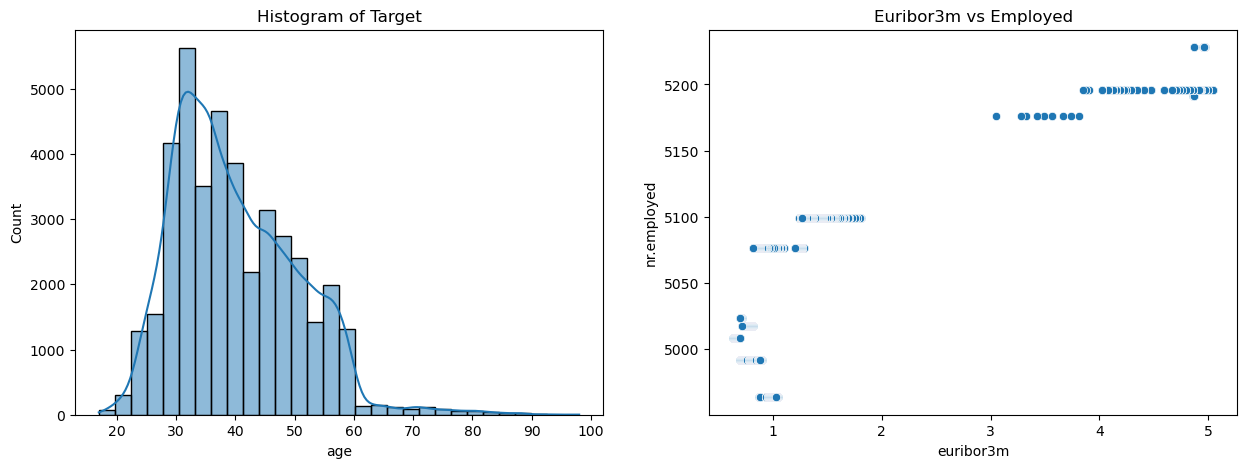

In [50]:
# Create Histogram and Scatter Plot

# Create canvas
plt.figure(figsize=(15,5))

# Plot 1st visualization
plt.subplot(1,2,1)
sns.histplot(df.age,kde=True,bins=30)
plt.title('Histogram of Target')

#Plot 2nd visualization
plt.subplot(1,2,2)
sns.scatterplot(x='euribor3m', y='nr.employed', data=df)
plt.title('Euribor3m vs Employed')

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

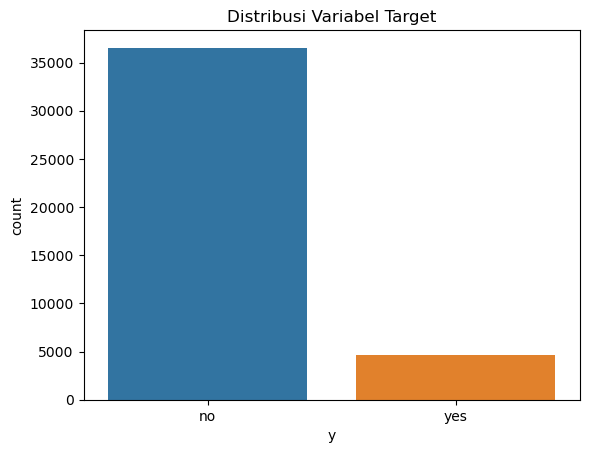

In [28]:
# Informasi dasar mengenai dataset
print(df.info())

# Deskripsi statistik
print(df.describe())

# Visualisasi distribusi variabel target
sns.countplot(x='y', data=df)
plt.title('Distribusi Variabel Target')
plt.show()

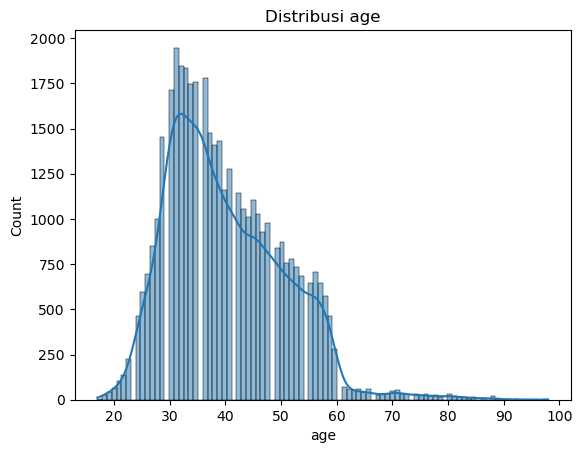

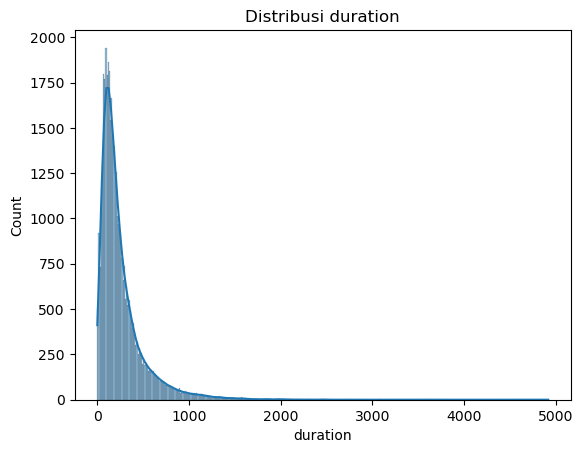

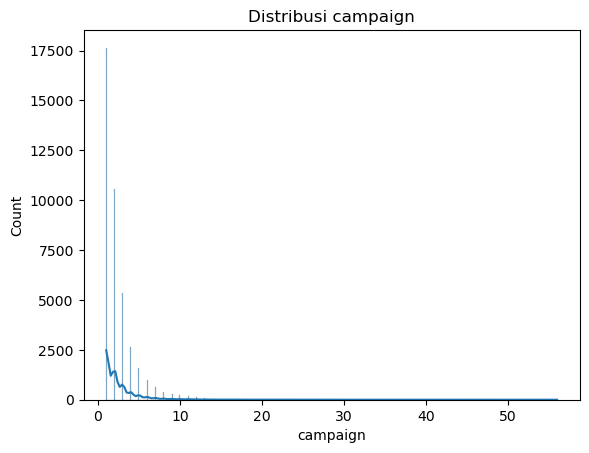

In [29]:
# Visualisasi beberapa fitur
features = ['age', 'duration', 'campaign']
for feature in features:
    plt.figure()
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.show()

## a. Missing Value Handling

In [51]:
X_train.isnull().sum()

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_profession

In [52]:
X_test.isnull().sum()

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_profession

In [53]:
y_train.isnull().sum()

0

In [54]:
y_test.isnull().sum()

0

## b. Outlier Handling 

In [55]:
# Detect categorical columns
X[X.select_dtypes(include=['object']).columns]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [56]:
# Create looping to check distribution numerical data

num = X.select_dtypes(exclude=['object']).columns.tolist()

# Create empty list fill (menyimpan) column list
normal = []
skew =[]
extreme = []
for i in num:
    print(f'skewness {i}: {round(X_train[i].skew(),3)}')

    if abs(round(X_train[i].skew(),3)) > 1:  # abs adalah absolute dalam syntax python
        extreme.append(i)
    elif abs(round(X_train[i].skew(),3)) > 0.5:
        skew.append(i)
    else:
        normal.append(i)

print(f'normal distribution: {normal}.') # cara1
print('skew distribution:', skew) # cara 2
print(f'extreme skew distribution: {extreme}.')

skewness age: 0.569
skewness duration: 1.045
skewness campaign: 1.209
skewness pdays: -4.943
skewness previous: 3.787
skewness emp.var.rate: -0.725
skewness cons.price.idx: -0.23
skewness cons.conf.idx: 0.31
skewness euribor3m: -0.711
skewness nr.employed: -1.048
normal distribution: ['cons.price.idx', 'cons.conf.idx'].
skew distribution: ['age', 'emp.var.rate', 'euribor3m']
extreme skew distribution: ['duration', 'campaign', 'pdays', 'previous', 'nr.employed'].


Berdasarkan hasil di atas, kolom yang terdistribusi:  
1. normal (threshold: -0.5 s/d 0.5): `cons.price.idx, cons.conf.idx, `  
2. Moderately Skew (-0.5 s/d -1 atau 0.5 s/d 1): `age, emp.var.rate, euribor3m`  
3. Extreme Skew (> 1 atau < -1): `duration, campaign, pdyas, previous, nr.employed`

### Outlier checking using for each distribution type

In [57]:
# Create function for normal distributed
def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary

### Skew and extreme checking 

In [58]:
# Create function for skew distrubution
def calculate_skewed_outliers(df, variable, distance):
    for i in variable: 
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        outliers = df[(df[variable]<lower_boundary)|(df[variable]>upper_boundary)]
        outliers_percentage = len(outliers)/len(df)*100
    #return f'Percentage of outliers in {variable}: {round(outliers_percentage),2}%'
    print(f'upper: {upper_boundary}')
    print(f'upper: {lower_boundary}')
    print(f'Outlier{variable} : {len(outliers)}')
    print(f'% Outlier {variable} :{round(outliers_percentage,2)}%')

#### Skew

In [60]:
# cara 1, manually calling function
calculate_skewed_outliers(X_train, 'age',1.5)

upper: 69.5
upper: 9.5
Outlierage : 0
% Outlier age :0.0%


<Axes: ylabel='Frequency'>

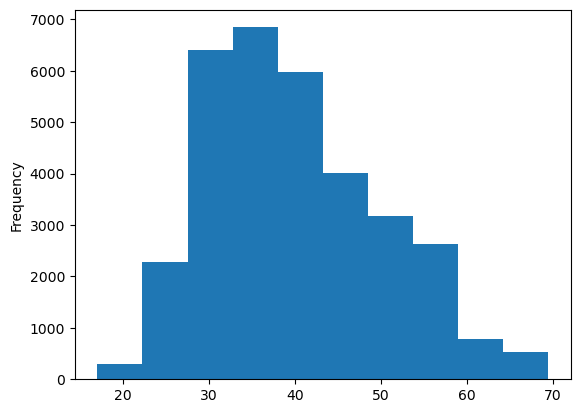

In [63]:
X_train.age.plot(kind='hist')

<Axes: ylabel='Frequency'>

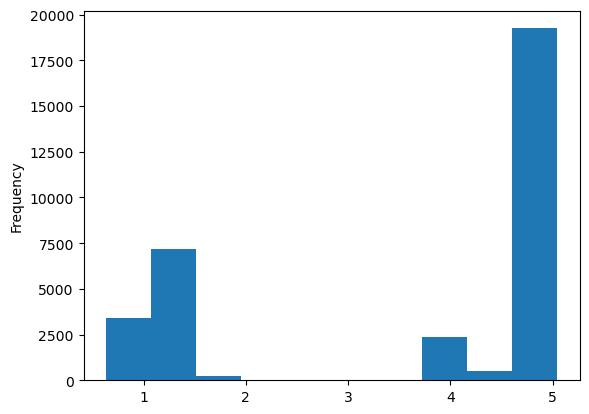

In [62]:
X_train.euribor3m.plot(kind='hist')

<Axes: >

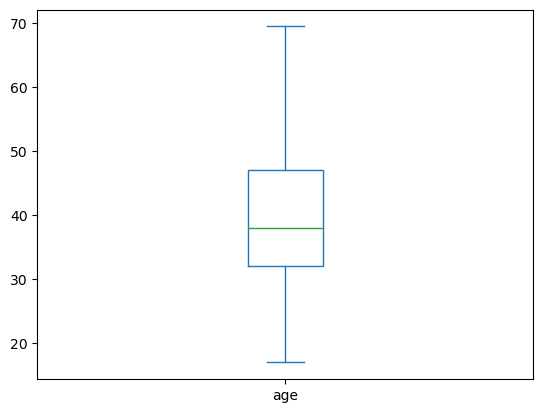

In [65]:
X_train.age.plot(kind='box')

<Axes: >

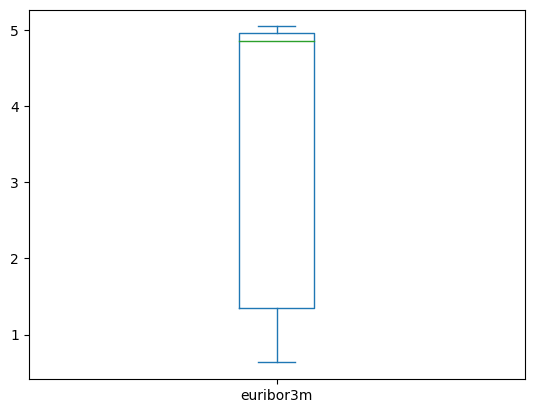

In [66]:
X_train.euribor3m.plot(kind='box')

#### Extreme skew

In [68]:
# cara 2, using loop to calling function
for i in extreme:
    calculate_skewed_outliers(X_train, i, 3)
    print('')

upper: 966.0
upper: -546.0
Outlierduration : 0
% Outlier duration :0.0%

upper: 9.0
upper: -5.0
Outliercampaign : 0
% Outlier campaign :0.0%

upper: 999.0
upper: 999.0
Outlierpdays : 1203
% Outlier pdays :3.65%

upper: 0.0
upper: 0.0
Outlierprevious : 4513
% Outlier previous :13.7%

upper: 5615.1
upper: 4712.1
Outliernr.employed : 0
% Outlier nr.employed :0.0%



In [69]:
# Create function for normal distributed
def calculate_normal_outliers(df, variable):
    for i in variable:
        upper_boundary = df[variable].mean() + 3 * df[variable].std()
        lower_boundary = df[variable].mean() - 3 * df[variable].std()
        
        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outliers_percentage = len(outliers) / len(df) * 100
    
    print(f'upper: {upper_boundary}')
    print(f'lower: {lower_boundary}')
    print(f'Outlier {variable} : {len(outliers)}')
    print(f'% Outlier {variable} : {round(outliers_percentage,2)}%')

In [70]:
for i in normal:
    calculate_skewed_outliers(X_train, i, 3)
    print('')

upper: 96.75099999999999
upper: 90.31800000000001
Outliercons.price.idx : 0
% Outlier cons.price.idx :0.0%

upper: -17.499999999999986
upper: -61.600000000000016
Outliercons.conf.idx : 0
% Outlier cons.conf.idx :0.0%



# v. Preprocessing Data

In [30]:
# Pisahkan fitur dan target
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

       age          job   marital            education  default housing loan  \
12556   40  blue-collar   married             basic.9y  unknown     yes   no   
35451   31       admin.   married    university.degree       no      no   no   
30592   59      retired   married             basic.4y       no      no   no   
17914   43    housemaid  divorced             basic.9y       no     yes   no   
3315    39       admin.    single          high.school  unknown      no   no   
...    ...          ...       ...                  ...      ...     ...  ...   
6265    58      retired   married  professional.course  unknown      no   no   
11284   37   management   married    university.degree       no      no   no   
38158   35       admin.   married          high.school       no     yes   no   
860     40   management   married    university.degree       no     yes   no   
15795   29       admin.    single    university.degree       no     yes   no   

         contact month day_of_week  dur

In [31]:
# Encoding variabel kategorikal
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Menyelaraskan kolom setelah encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Menangani outlier menggunakan Winsorizer
winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['age', 'duration', 'campaign'])
X_train = winsor.fit_transform(X_train)
X_test = winsor.transform(X_test)
print(winsor)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['age', 'duration', 'campaign'])


# vi. Model Building dan Evaluasi

Accuracy: 0.907623209516873
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.39      0.49       935

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



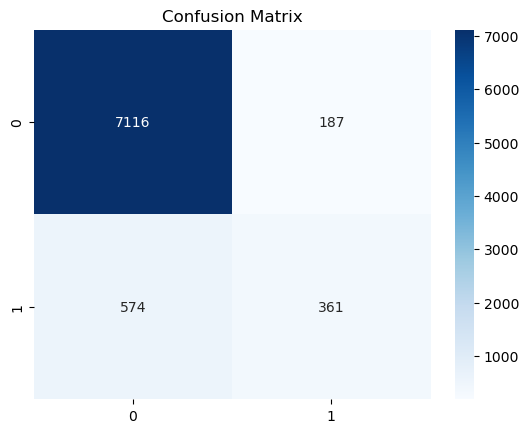

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# vii. Tuning dan Validasi

In [33]:
param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f'Best parameters: {grid.best_params_}')

# Evaluasi ulang dengan model terbaik
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_best)}')
print(classification_report(y_test, y_pred_best))

Best parameters: {'C': 10}
Accuracy: 0.9073804321437242
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7303
           1       0.66      0.38      0.48       935

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.72      8238
weighted avg       0.89      0.91      0.90      8238



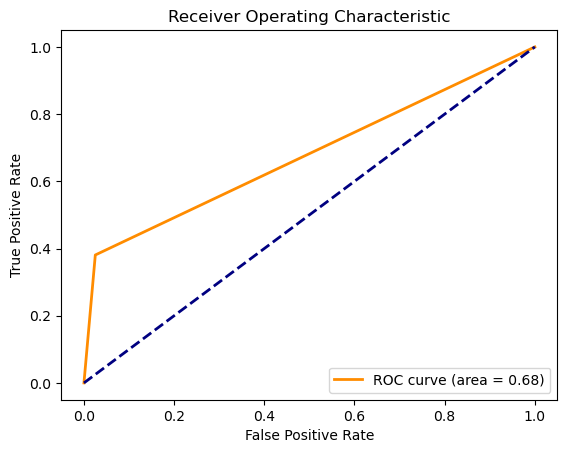

In [34]:
# ROC Curve dan AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# viii. Uji dengan Dataset Lain

In [35]:
df_full = pd.read_csv('bank/bank-full.csv', sep=';')

X_full = df_full.drop('y', axis=1)
y_full = df_full['y'].apply(lambda x: 1 if x == 'yes' else 0)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Preprocessing sama seperti sebelumnya
X_train_full = pd.get_dummies(X_train_full, drop_first=True)
X_test_full = pd.get_dummies(X_test_full, drop_first=True)
X_train_full, X_test_full = X_train_full.align(X_test_full, join='left', axis=1, fill_value=0)

X_train_full = winsor.fit_transform(X_train_full)
X_test_full = winsor.transform(X_test_full)

best_model.fit(X_train_full, y_train_full)
y_pred_full = best_model.predict(X_test_full)
print(f'Accuracy: {accuracy_score(y_test_full, y_pred_full)}')
print(classification_report(y_test_full, y_pred_full))


Accuracy: 0.8818976003538649
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      7952
           1       0.54      0.13      0.21      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.56      0.57      9043
weighted avg       0.85      0.88      0.85      9043

